This is a reusable notebook where you just change the value of a variable and it does the moving,
unzipping and returning of contents

In [0]:
fileroot =  "clinicaltrial_2021.csv" #Give exact file name here
Year = '2021'                        #Give Year also according to file

Making the environment

In [0]:
#Renaming the files
#dbutils.fs.cp('/FileStore/tables/clinicaltrial_2019_csv.gz','/FileStore/tables/clinicaltrial_2019.csv.gz')
#dbutils.fs.cp('/FileStore/tables/clinicaltrial_2020_csv.gz','/FileStore/tables/clinicaltrial_2020.csv.gz')
dbutils.fs.cp('/FileStore/tables/clinicaltrial_2021_csv.gz','/FileStore/tables/clinicaltrial_2021.csv.gz')

Out[32]: True

In [0]:
dbutils.fs.cp("/FileStore/tables/" + fileroot + ".gz", "file:/tmp/")
import os
os.environ ['fileroot'] = fileroot

In [0]:
%sh gunzip -d /tmp/$fileroot.gz 

In [0]:
from pathlib import Path
Path("/FileStore/tables/" + fileroot).mkdir(parents=True, exist_ok=True)
#dbutils.fs.mkdirs ("/FileStore/tables/" + fileroot )
dbutils.fs.mv("file:/tmp/" + fileroot , "/FileStore/tables/" + fileroot , True )

Out[35]: True

In [0]:
ClinicalTrial2021= ('dbfs:/FileStore/tables/'+fileroot)
DF2021 = spark.read.format('csv')\
.options(header='true', inferSchema='true')\
.options(delimiter='|')\
.load(ClinicalTrial2021)
DF2021.count()

Out[36]: 387261

Question 2

In [0]:
DF2021_Count1=DF2021.groupby(['Type']).count()
DF2021_Count=DF2021_Count1.orderBy(['count'], ascending=False)
DF2021_Count.display()

Type,count
Interventional,301472
Observational,77540
Observational [Patient Registry],8180
Expanded Access,69


Question 3

In [0]:
from pyspark.sql.functions import col, split, explode  
DF2021_Split_Conditions= DF2021.withColumn('conditions', explode(split(DF2021['conditions'],',')))
DF2021_Conditions_Count1=DF2021_Split_Conditions.groupby(['conditions']).count()
DF2021_Conditions_Count=DF2021_Conditions_Count1.orderBy(['count'], ascending=False)
DF2021_Conditions_Count.display()

conditions,count
Carcinoma,13389
Diabetes Mellitus,11080
Neoplasms,9371
Breast Neoplasms,8640
Syndrome,8032
Leukemia,5904
Lung Neoplasms,5598
COVID-19,5567
Lymphoma,5395
Hypertension,5364


Question 4

In [0]:
mesh=('dbfs:/FileStore/tables/mesh.csv')
#for l in dbutils.fs.head(mesh).splitlines():
#    print(l)
DFmesh = spark.read.format('csv')\
.options(header='true', inferSchema='true')\
.options(delimiter=',')\
.load(mesh)
#display(DFmesh)

In [0]:
DFmesh.printSchema()

root
 |-- term: string (nullable = true)
 |-- tree: string (nullable = true)



In [0]:
DFmesh_Code= DFmesh.withColumn('NewCode', DFmesh.tree.substr(1,3))
DFmesh_Join1=  DF2021_Split_Conditions.conditions == DFmesh_Code.term
DFmesh_Join= DF2021_Split_Conditions.join(DFmesh_Code, on = DFmesh_Join1, how='inner')
DFmesh_Disease_Code=DFmesh_Join.select('NewCode').groupby(['NewCode']).count().orderBy(['count'], ascending= False)
DFmesh_Disease_Code.display()


NewCode,count
C04,143994
C23,136079
C01,106674
C14,94523
C10,92310
C06,85646
C08,70720
C13,42599
C18,41276
C12,40161


Question 5

In [0]:
pharma=('dbfs:/FileStore/tables/pharma.csv')
#for l in dbutils.fs.head(pharma).splitlines():
#    print(l)
DFpharma=spark.read.format('csv')\
.options(header='true', inferSchema='true')\
.options(delimiter=',')\
.load(pharma)
#DFpharma.display()

In [0]:
DFpharma.printSchema()

root
 |-- Company: string (nullable = true)
 |-- Parent_Company: string (nullable = true)
 |-- Penalty_Amount: string (nullable = true)
 |-- Subtraction_From_Penalty: string (nullable = true)
 |-- Penalty_Amount_Adjusted_For_Eliminating_Multiple_Counting: string (nullable = true)
 |-- Penalty_Year: integer (nullable = true)
 |-- Penalty_Date: integer (nullable = true)
 |-- Offense_Group: string (nullable = true)
 |-- Primary_Offense: string (nullable = true)
 |-- Secondary_Offense: string (nullable = true)
 |-- Description: string (nullable = true)
 |-- Level_of_Government: string (nullable = true)
 |-- Action_Type: string (nullable = true)
 |-- Agency: string (nullable = true)
 |-- Civil/Criminal: string (nullable = true)
 |-- Prosecution_Agreement: string (nullable = true)
 |-- Court: string (nullable = true)
 |-- Case_ID: string (nullable = true)
 |-- Private_Litigation_Case_Title: string (nullable = true)
 |-- Lawsuit_Resolution: string (nullable = true)
 |-- Facility_State: string

In [0]:
DFpharma_Join1=DF2021.Sponsor == DFpharma.Parent_Company
DFpharma_Join= DF2021.join(DFpharma, on = DFpharma_Join1, how='left')
#DFpharma_Join.display()

In [0]:
DFpharma_Sponsor1= DFpharma_Join.select('Sponsor', 'Parent_Company').where('Parent_Company is null')
DFpharma_Sponsor=DFpharma_Sponsor1.groupby(['Sponsor']).count().orderBy(['count'], ascending=False)
DFpharma_Sponsor.display()


Sponsor,count
National Cancer Institute (NCI),3218
M.D. Anderson Cancer Center,2414
Assistance Publique - Hôpitaux de Paris,2369
Mayo Clinic,2300
Merck Sharp & Dohme Corp.,2243
Assiut University,2154
Novartis Pharmaceuticals,2088
Massachusetts General Hospital,1971
Cairo University,1928
Hoffmann-La Roche,1828


Question 6

In [0]:
DF2021_Study1=DF2021.withColumn('Month', split(DF2021['Completion'], ' ').getItem(0))\
.withColumn('year', split(DF2021['Completion'], ' ').getItem(1))
#DF2021_Study1.show()

In [0]:
DF2021_Study_Filter=DF2021_Study1.filter((DF2021_Study1.Status=='Completed') & 
(DF2021_Study1.year==Year)).groupby('Month').count()
#DF2021_Study_Filter.show()

In [0]:
from pyspark.sql.functions import col,when
DF2021_Study_Month_Arrangment1= DF2021_Study_Filter.orderBy(when(col('Month') == 'Jan',1)
                                                            .when(col('Month') == 'Feb',2)
                                                            .when(col('Month') == 'Mar',3)
                                                            .when(col('Month') == 'Apr',4)
                                                            .when(col('Month') == 'May',5)
                                                            .when(col('Month') == 'Jun',6)
                                                            .when(col('Month') == 'Jul',7)
                                                            .when(col('Month') == 'Aug',8)
                                                            .when(col('Month') == 'Sep',9)
                                                            .when(col('Month') == 'Oct',10)
                                                            .when(col('Month') == 'Nov',11)
                                                            .when(col('Month') == 'Dec',12))
DF2021_Study_Month_Arrangment=DF2021_Study_Month_Arrangment1.withColumnRenamed('count', 'Year '+Year)
DF2021_Study_Month_Arrangment.show()
                                                       

+-----+---------+
|Month|Year 2021|
+-----+---------+
|  Jan|     1131|
|  Feb|      934|
|  Mar|     1227|
|  Apr|      967|
|  May|      984|
|  Jun|     1094|
|  Jul|      819|
|  Aug|      700|
|  Sep|      528|
|  Oct|      187|
+-----+---------+



In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as ploting

Out[50]: <AxesSubplot:xlabel='Month'>

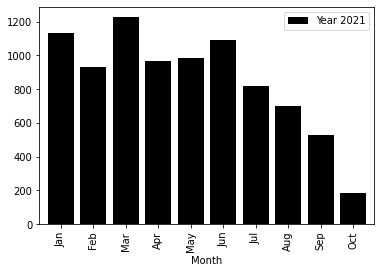

In [0]:
DF2021_Study_Month_Arrangment2=DF2021_Study_Month_Arrangment.toPandas()
DF2021_Study_Month_Arrangment2.plot.bar(x='Month', y='Year '+Year, color='black' , width= 0.8)


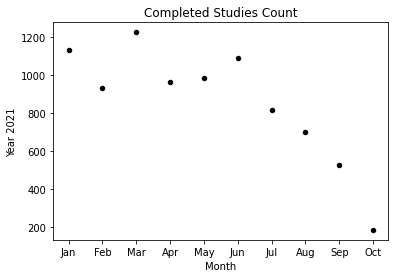

In [0]:
DF2021_Study_Month_Arrangment2.plot(kind='scatter', x='Month', y='Year '+Year, color='black')
ploting.title('Completed Studies Count')
ploting.show()
#DF2021_Study_Month_Arrangment2.plot.scatter(x='Month', y='Year '+Year, color='black',  s=50);

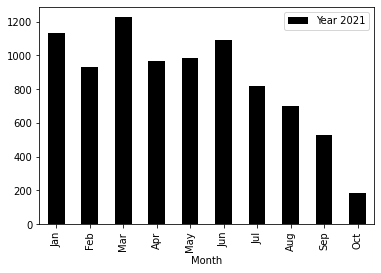

In [0]:
DF2021_Study_Month_Arrangment2=DF2021_Study_Month_Arrangment.toPandas()
DF2021_Study_Month_Arrangment2.plot.bar(x='Month', y='Year '+Year, color='black', stacked=True);

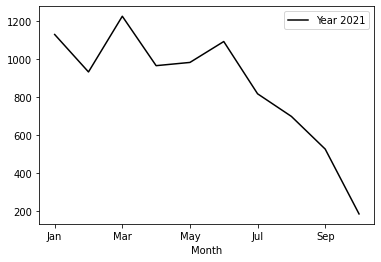

In [0]:
DF2021_Study_Month_Arrangment2=DF2021_Study_Month_Arrangment.toPandas()
DF2021_Study_Month_Arrangment2.plot(x='Month', y='Year '+Year, color='black');

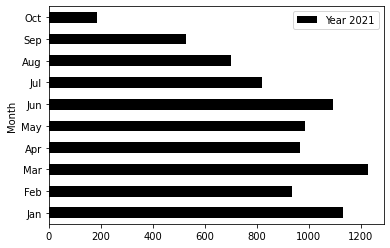

In [0]:
DF2021_Study_Month_Arrangment2.plot.barh(x='Month', y='Year '+Year, color='black',stacked=True);

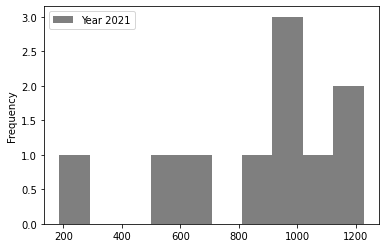

In [0]:
DF2021_Study_Month_Arrangment2.plot.hist(color='black', alpha=0.5);